# Information Cascades en Grafos

In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = "./results.csv"
def wipeResults(filename):
    f = open(filename,"w+")
    f.write("Graph type;Number of nodes;Edge chance;Opinions affected by Cascade;Opinions Changed by Cascade\n")



## Experimento 1: influencia de Edge Chance en Opiniones 

In [88]:
filename ="./data/edgeChance.csv"
wipeResults(filename)
repetitions = 10
noLogs = 'true'
numberOfNodes = 50
for e in np.arange(0,1.1,0.1):
    for i in range(repetitions):
        !node index $filename $e $noLogs $numberOfNodes

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 8 decides:  red 

Node : 9 sees red
Looking at his neighbours 

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 8 decides:  red 

Node : 9 sees red
Looking at his neig

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 8 decides:  blue 

Node : 9 sees blue
Looking at h

Looking at his neighbours sees {}
mantained his decision:  blue
Node 34 decides:  blue 

Node : 35 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 35 decides:  red 

Node : 36 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 36 decides:  red 

Node : 37 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 37 decides:  red 

Node : 38 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 38 decides:  red 

Node : 39 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 39 decides:  blue 

Node : 40 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 40 decides:  red 

Node : 41 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 41 decides:  red 

Node : 42 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 42 decides:  blue 

Node : 43 sees red
Looking at his neighbours sees {}
mant

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 8 decides:  red 

Node : 9 sees red
Looking at his neighbours see

Node : 16 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 16 decides:  red 

Node : 17 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 17 decides:  blue 

Node : 18 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 18 decides:  red 

Node : 19 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 19 decides:  red 

Node : 20 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 20 decides:  blue 

Node : 21 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 21 decides:  red 

Node : 22 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 22 decides:  blue 

Node : 23 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 23 decides:  red 

Node : 24 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 24 decides:  red 

Node : 25 sees red
Looking at his nei

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { blue: 2 }
it has been influenced towards:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 8 decides:  red 

No

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 8 decides:  red 

Node : 9 sees red
Looking at his neighbour

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 8 decides:  blue 

Node

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 8 decides:  red 

Node : 9 sees red
Looking at 

Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 20 decides:  red 

Node : 21 sees red
Looking at his neighbours sees { blue: 2 }
it has been influenced towards:  blue
Node 21 decides:  blue 

Node : 22 sees red
Looking at his neighbours sees { blue: 2 }
it has been influenced towards:  blue
Node 22 decides:  blue 

Node : 23 sees blue
Looking at his neighbours sees { blue: 3 }
mantained his decision:  blue
Node 23 decides:  blue 

Node : 24 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 24 decides:  blue 

Node : 25 sees red
Looking at his neighbours sees { blue: 3, red: 2 }
mantained his decision:  red
Node 25 decides:  red 

Node : 26 sees blue
Looking at his neighbours sees { blue: 4 }
mantained his decision:  blue
Node 26 decides:  blue 

Node : 27 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 27 decides:  blue 

Node : 28 sees red
Looking at his neighbours sees { blue: 2 

Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 35 decides:  blue 

Node : 36 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 36 decides:  blue 

Node : 37 sees blue
Looking at his neighbours sees { blue: 4, red: 1 }
mantained his decision:  blue
Node 37 decides:  blue 

Node : 38 sees red
Looking at his neighbours sees { blue: 4, red: 1 }
it has been influenced towards:  blue
Node 38 decides:  blue 

Node : 39 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 39 decides:  blue 

Node : 40 sees blue
Looking at his neighbours sees { blue: 5, red: 1 }
mantained his decision:  blue
Node 40 decides:  blue 

Node : 41 sees blue
Looking at his neighbours sees { blue: 4, red: 1 }
mantained his decision:  blue
Node 41 decides:  blue 

Node : 42 sees blue
Looking at his neighbours sees { blue: 7, red: 1 }
mantained his decision:  blue
Node 42 decides:  blue 

Node : 43 sees blue
L

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 4 }
it has been influenced towards:  red
Node 8 decides:  red 

Node : 9 sees red
Looking a

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 8 decides:  blue 



RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 8 decides:  blue 

Node : 9 sees red
Looking at hi

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { blue: 2 }
it has been influenced towards:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decisio

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { blue: 3 }
it has been influenced towards:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { blue: 2 }
mantained hi

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
N

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { red: 3 }
it has been influenced towards:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 2 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decis

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 8 decides:  red 

Node : 9

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 3 }
it has been influenced towards:  red
Node 8 deci

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { blue: 2 }
it has been influenced towards:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 8 decides:  red 

Node : 9 se

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 8 decides:  red 

No

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decisi

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { blue: 3 }
it has been influenced towards:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  r

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 2, blue: 1 }
mantained his decisi

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees {}
mantained his decisi

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 2 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 8 decid

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  red
Nod

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { red: 2, blue: 1 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { red: 2 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 1, blue: 2 }
mantai

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 8 decides:  red 

Node

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { red: 2 }
it has been influenced towards:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 8 decides:

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { blue: 3 }
it has been influenced towards:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { red: 2, blue: 2 }
mantained hi

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { red: 2, blue: 1 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbours sees { red: 1, blue: 1 }
mantain

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 3, red: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision: 

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { blue: 3, red: 2 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 2, red: 2 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbours sees { blue: 1 }
mantained 

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 3, blue: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { red: 2, blue: 1 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { red: 3, blue: 1 }
mantai

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 2, blue: 2 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { red: 2, blue: 2 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { red: 3, blue: 2 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { blue: 1, red

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { blue: 1, red: 3 }
it has been influenced towards:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { red: 3, blue: 1 }
it has b

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { blue: 2 }
it has been influenced towards:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { red: 3, blue: 3 }
mantained

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { blue: 3 }
it has been influenced towards:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { blue: 3 }
mantained his decisio

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 3, blue: 1 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { blue: 3, red: 4 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { blue: 1, red

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { red: 3, blue: 2 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbours sees { red: 2, blue: 1 }
mantain

Influencing indexes for node 42 :  [ 1, 2, 3, 6, 7, 9, 13, 14, 15, 17, 20, 23, 24, 27, 30, 32, 34, 37, 39, 41 ]
Influencing indexes for node 43 :  [ 0, 3, 4, 6, 7, 12, 13, 15, 17, 19, 23, 28, 29, 34, 36, 42 ]
Influencing indexes for node 44 :  [ 1, 2, 3, 5, 7, 8, 14, 19, 20, 22, 23, 28, 29, 31, 32, 33, 36, 41, 43 ]
Influencing indexes for node 45 :  [ 1,
  4,
  6,
  7,
  9,
  10,
  11,
  14,
  15,
  16,
  17,
  18,
  24,
  25,
  27,
  31,
  32,
  34,
  35,
  36,
  37,
  38,
  40 ]
Influencing indexes for node 46 :  [ 7, 8, 9, 11, 13, 15, 20, 21, 22, 25, 26, 27, 28, 31, 32, 36, 38, 41, 43, 44 ]
Influencing indexes for node 47 :  [ 9, 10, 11, 14, 15, 17, 18, 19, 24, 30, 34, 35, 40, 41, 44, 45, 46 ]
Influencing indexes for node 48 :  [ 0, 3, 7, 8, 9, 12, 17, 19, 21, 23, 24, 26, 28, 29, 30, 33, 34, 37, 41, 44 ]
Influencing indexes for node 49 :  [ 3, 5, 8, 11, 14, 15, 17, 19, 20, 23, 24, 25, 29, 32, 33, 39, 43 ]

Number of nodes whose opinion didnt matter:  45
Number of nodes who changed o

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 3 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { blue: 3, red: 1 }
it has been influenced towards:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { blue: 2 }
man

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { blue: 1, red: 2 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { blue:

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { red: 3 }
it has been influenced towards:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { blue: 1, red: 3 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { blue: 1, red: 4 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { blue: 1, red: 4 }
mant

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { blue: 1, red: 2 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { blue: 3, red: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbours sees { blue: 2, red: 2 }
mantained his 

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { red: 4 }
it has been influenced towards:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 2 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 4 }
it has 

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { blue: 3, red: 1 }
it has been influenced towards:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { blue: 3 }
it has been influenced towards:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { blue: 5

Influencing indexes for node 30 :  [ 1, 2, 4, 7, 8, 11, 12, 13, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28 ]
Influencing indexes for node 31 :  [ 0, 1, 2, 3, 6, 7, 10, 11, 12, 13, 15, 19, 21, 23, 28, 29 ]
Influencing indexes for node 32 :  [ 2, 6, 7, 9, 12, 14, 15, 16, 21, 23, 26, 27, 28, 29, 30, 31 ]
Influencing indexes for node 33 :  [ 0, 3, 4, 5, 7, 10, 14, 21, 23, 24, 25, 26, 31 ]
Influencing indexes for node 34 :  [ 0, 1, 2, 3, 4, 5, 8, 12, 13, 15, 22, 26, 27, 28, 29, 30, 31, 33 ]
Influencing indexes for node 35 :  [ 0, 3, 9, 12, 13, 17, 18, 19, 22, 24, 26, 28, 34 ]
Influencing indexes for node 36 :  [ 0, 1, 2, 4, 5, 7, 11, 13, 15, 16, 17, 18, 19, 20, 21, 28, 29, 30, 31, 34 ]
Influencing indexes for node 37 :  [ 1, 2, 3, 5, 6, 8, 12, 16, 17, 20, 21, 22, 24, 25, 26, 27, 29, 32, 33, 34, 36 ]
Influencing indexes for node 38 :  [ 0, 1, 5, 10, 11, 12, 13, 15, 20, 22, 26, 32, 33, 37 ]
Influencing indexes for node 39 :  [ 5, 7, 8, 9, 10, 12, 18, 20, 21, 23, 28, 31, 33, 35, 37 ]
Influencing i

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees { red: 2 }
it has been influenced towards:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 3 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 2 }
it has been influenced towards:  red
Nod

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { red: 2, blue: 2 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { blue

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { red: 2, blue: 1 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 3, red: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { blue: 3, red: 1 }
mantaine

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { red: 1, blue: 3 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { red: 1, blue: 3 }
it has been influenced towards:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { red: 1, blue: 3 }
it has been influenced towards:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbo

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { blue: 1, red: 3 }
it has been influenced towards:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees { blue: 1, red: 2 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { blue: 1, red: 4 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { blue: 1, 

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { red: 3 }
it has been influenced towards:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { red: 3 }
it has been influenced towards:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 4 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { red: 5 }
mantained his decision:  

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { red: 2, blue: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 2, blue: 2 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { red: 2, blue: 1 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { red: 6, blue: 2 }
ma

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { blue: 3 }
it has been influenced towards:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { blue: 3 }
it has been influenced towards:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { blue: 2 }
it has been influenced towards:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 4 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees {

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { red: 2, blue: 2 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { red: 1, blue: 3 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours see

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees { blue: 2 }
it has been influenced towards:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 4 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { blue: 2 }
it has been influenced towards:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { blue: 4 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 5 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { blue: 

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 5 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { red: 6 }
mantained his decision:  red
Node 8

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 2, blue: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees { blue: 2, red: 2 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { blue: 2, red: 2 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 4 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees 

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { blue: 3 }
it has been influenced towards:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbours sees 

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { blue: 1, red: 2 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { blue: 1, red: 2 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { blue: 1, red: 4 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { blue: 1, red: 4 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { blue: 1, red: 4 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { blue: 1, red

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { red: 2, blue: 3 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { red: 2, blue: 3 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbo

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { blue: 2, red: 2 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { blue: 2, red: 2 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 2, red: 4 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { blue

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { blue: 2, red: 2 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { blue: 3, red: 2 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { blue: 2, red: 4 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { blue

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { blue: 3, red: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { blue: 3, red: 1 }
it has been influenced towards:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 4 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his ne

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { red: 2, blue: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { blue: 3, red: 2 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 3, red: 2 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his 

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 3, red: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { blue: 3, red: 1 }
it has been influenced towards:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { blue: 3, red: 1 }
it has been influenced towards:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 3 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 5 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 5 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { red: 4 }
mantained his decision:  red
Node 8

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { blue: 2 }
it has been influenced towards:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { blue: 3, red: 1 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 3, red: 2 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looking at his neighbours sees { b

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { red: 2, blue: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { blue: 2, red: 2 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { blue: 3, red: 1 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { blue: 4, red: 1 }
it has been influenced towards:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Look

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { red: 2, blue: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { red: 2, blue: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { blue: 1, red: 3 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 5, blue: 2 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { 

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { red: 2 }
it has been influenced towards:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { red: 4 }
it has been influenced towards:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees { red: 2 }
it has been influenced towards:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { red: 5 }
it has been influenced towards:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { red: 5 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 6 }
it has

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { red: 4 }
it has been influenced towards:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 6 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 5 }
it has been influenced towards:  

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { red: 2 }
it has been influenced towards:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { red: 3 }
it has been influenced towards:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees { red: 5 }
it has been influenced towards:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 4 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { red: 4 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 4 }
it has been infl

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees { red: 3 }
it has been influenced towards:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 5, blue: 1 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { red: 6, blue: 1 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 5 }
it h

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees { red: 2, blue: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { red: 2, blue: 2 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { red: 3, blue: 3 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours se

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { red: 2 }
it has been influenced towards:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { red: 4 }
it has been influenced towards:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees { red: 4 }
it has been influenced towards:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 4 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 7 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 8 }
it has

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { blue: 1, red: 2 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { blue: 1, red: 2 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { blue: 1, red: 5 }
it has been influenced towards:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { blue: 1, red: 4 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours se

Influencing indexes for node 29 :  [ 0,
  1,
  2,
  4,
  5,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  28 ]
Influencing indexes for node 30 :  [ 0, 1, 3, 5, 6, 8, 10, 11, 12, 13, 17, 19, 23, 24, 25, 26, 27, 28 ]
Influencing indexes for node 31 :  [ 0,
  1,
  2,
  3,
  4,
  6,
  7,
  8,
  9,
  11,
  12,
  13,
  14,
  15,
  16,
  18,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30 ]
Influencing indexes for node 32 :  [ 0,
  1,
  2,
  3,
  4,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  26,
  27,
  29,
  30,
  31 ]
Influencing indexes for node 33 :  [ 0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  25,
  26,
  27,
  28,
  29,
  32 ]
Influencing indexes for node 34 :  [ 0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  20,

Node 35 decides:  blue 

Node : 36 sees red
Looking at his neighbours sees { red: 7, blue: 19 }
it has been influenced towards:  blue
Node 36 decides:  blue 

Node : 37 sees red
Looking at his neighbours sees { red: 8, blue: 25 }
it has been influenced towards:  blue
Node 37 decides:  blue 

Node : 38 sees red
Looking at his neighbours sees { red: 8, blue: 21 }
it has been influenced towards:  blue
Node 38 decides:  blue 

Node : 39 sees red
Looking at his neighbours sees { red: 9, blue: 26 }
it has been influenced towards:  blue
Node 39 decides:  blue 

Node : 40 sees red
Looking at his neighbours sees { red: 9, blue: 26 }
it has been influenced towards:  blue
Node 40 decides:  blue 

Node : 41 sees red
Looking at his neighbours sees { red: 8, blue: 27 }
it has been influenced towards:  blue
Node 41 decides:  blue 

Node : 42 sees red
Looking at his neighbours sees { red: 7, blue: 25 }
it has been influenced towards:  blue
Node 42 decides:  blue 

Node : 43 sees red
Looking at his nei

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { blue: 1, red: 2 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { blue: 2, red: 2 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees { blue: 2, red: 3 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { blue: 3, red: 2 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 2, red: 3 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbo

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { blue: 3 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 3 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { blue: 5 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { blue: 5 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 7 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { blue: 7 }
mantained 

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { blue: 1, red: 2 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 2, red: 2 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { blue: 3, red: 2 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { blue: 4, red: 2 }
it has been influenced towards:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { blue: 5, red: 2 }
it has been influenced towards:  blue
Node 7 decides:  blue 

Node : 8 sees bl

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 3 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { blue: 4, red: 1 }
it has been influenced towards:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { blue: 5, red: 1 }
it has been influenced towards:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 5, red: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at 

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 2, red: 2 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { blue: 3, red: 1 }
it has been influenced towards:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { blue: 4, red: 2 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { blue: 5, red: 2 }
it has been influenced towards:  blue
Node 7 decides:  blue 

Node : 8 sees red

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { red: 3 }
it has been influenced towards:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 4 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 5 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 6 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 7 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 7 }
it has been influenced t

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 2, blue: 3 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { red: 3, blue: 3 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { red: 3, blue: 3 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neigh

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { blue: 2, red: 2 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { blue: 3, red: 1 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { blue: 4, red: 2 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 5, red: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at 

Influencing indexes for node 24 :  [ 0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23 ]
Influencing indexes for node 25 :  [ 0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23 ]
Influencing indexes for node 26 :  [ 0,
  1,
  2,
  4,
  5,
  6,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24 ]
Influencing indexes for node 27 :  [ 0,
  1,
  2,
  3,
  5,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26 ]
Influencing indexes for node 28 :  [ 0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27 ]
Influencing indexes for node 29 :  [ 0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  10,
  13,
  14,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28 ]
Influencing indexes for node 30 :  [ 0,
  1,
  2,
  4

Influencing indexes for node 34 :  [ 0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  28,
  29,
  30,
  31,
  32 ]
Influencing indexes for node 35 :  [ 0,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34 ]
Influencing indexes for node 36 :  [ 0,
  1,
  2,
  3,
  4,
  5,
  7,
  8,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  29,
  30,
  31,
  32,
  33,
  34,
  35 ]
Influencing indexes for node 37 :  [ 0,
  1,
  2,
  3,
  4,
  5,
  6,
  8,
  9,
  10,
  11,
  12,
  13,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  30,
  31,
  32,
  33,
  34,
  35,
  36 ]
Influencing indexes for node 38 :  [ 1,
  2,
  3,
  4,
  5,
  6,
  8,
  9,
  10,
  11,
  12,
  13,
  16,
  17,
  18,
 

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { red: 1, blue: 2 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { red: 1, blue: 3 }
it has been influenced towards:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { red: 1, blue: 3 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { red: 1, blue: 4 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { red: 1, blue: 4 }
it has been influenced towards:  blue
Node 7 decides:  blue 

Node : 8 sees 

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { red: 4 }
it has been influenced towards:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 5 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 6 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 7 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { red: 8 }
mantained his decision:  r

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees { blue: 3 }
it has been influenced towards:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 4 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { blue: 5 }
it has been influenced towards:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { blue: 6 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { blue: 7 }
it has been influenced towards:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees {

Influencing indexes for node 26 :  [ 0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25 ]
Influencing indexes for node 27 :  [ 0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26 ]
Influencing indexes for node 28 :  [ 0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27 ]
Influencing indexes for node 29 :  [ 0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28 ]
Influencing indexes for node 30 :  [ 0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29 ]
Influencing indexes for node 3

it has been influenced towards:  blue
Node 32 decides:  blue 

Node : 33 sees red
Looking at his neighbours sees { blue: 32, red: 1 }
it has been influenced towards:  blue
Node 33 decides:  blue 

Node : 34 sees blue
Looking at his neighbours sees { blue: 33, red: 1 }
mantained his decision:  blue
Node 34 decides:  blue 

Node : 35 sees red
Looking at his neighbours sees { blue: 34, red: 1 }
it has been influenced towards:  blue
Node 35 decides:  blue 

Node : 36 sees red
Looking at his neighbours sees { blue: 35, red: 1 }
it has been influenced towards:  blue
Node 36 decides:  blue 

Node : 37 sees blue
Looking at his neighbours sees { blue: 36, red: 1 }
mantained his decision:  blue
Node 37 decides:  blue 

Node : 38 sees blue
Looking at his neighbours sees { blue: 37, red: 1 }
mantained his decision:  blue
Node 38 decides:  blue 

Node : 39 sees red
Looking at his neighbours sees { blue: 38, red: 1 }
it has been influenced towards:  blue
Node 39 decides:  blue 

Node : 40 sees red
L

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 3, red: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees red
Looking at his neighbours sees { blue: 4, red: 1 }
it has been influenced towards:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { blue: 5, red: 1 }
it has been influenced towards:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 6, red: 1 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees red
Looking at his neighbours sees { blue: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { blue: 2, red: 2 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { blue: 3, red: 2 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { blue: 4, red: 2 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees red
Looking at his neighbours sees { blue: 5, red: 2 }
it has been influenced towards:  blue
Node 7 decides:  blue 

Node : 8 sees red
Looki

BLUE URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { red: 2 }
it has been influenced towards:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { red: 3 }
it has been influenced towards:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 4 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees blue
Looking at his neighbours sees { red: 5 }
it has been influenced towards:  red
Node 5 decides:  red 

Node : 6 sees blue
Looking at his neighbours sees { red: 6 }
it has been influenced towards:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { red: 7 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees blue
Looking at his neighbours sees { red: 8 }
it has

BLUE URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees blue
Looking at his neighbours sees { blue: 2 }
mantained his decision:  blue
Node 2 decides:  blue 

Node : 3 sees blue
Looking at his neighbours sees { blue: 3 }
mantained his decision:  blue
Node 3 decides:  blue 

Node : 4 sees blue
Looking at his neighbours sees { blue: 4 }
mantained his decision:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { blue: 5 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees blue
Looking at his neighbours sees { blue: 6 }
mantained his decision:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 7 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours sees { blue: 8 }
mantained 

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees red
Looking at his neighbours sees { red: 2 }
mantained his decision:  red
Node 2 decides:  red 

Node : 3 sees blue
Looking at his neighbours sees { red: 3 }
it has been influenced towards:  red
Node 3 decides:  red 

Node : 4 sees red
Looking at his neighbours sees { red: 4 }
mantained his decision:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 5 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 6 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees red
Looking at his neighbours sees { red: 7 }
mantained his decision:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { red: 8 }
mantained his decision:  red
Node 8

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

Node : 1 sees red
Looking at his neighbours sees { red: 1 }
mantained his decision:  red
Node 1 decides:  red 

Node : 2 sees blue
Looking at his neighbours sees { red: 2 }
it has been influenced towards:  red
Node 2 decides:  red 

Node : 3 sees red
Looking at his neighbours sees { red: 3 }
mantained his decision:  red
Node 3 decides:  red 

Node : 4 sees blue
Looking at his neighbours sees { red: 4 }
it has been influenced towards:  red
Node 4 decides:  red 

Node : 5 sees red
Looking at his neighbours sees { red: 5 }
mantained his decision:  red
Node 5 decides:  red 

Node : 6 sees red
Looking at his neighbours sees { red: 6 }
mantained his decision:  red
Node 6 decides:  red 

Node : 7 sees blue
Looking at his neighbours sees { red: 7 }
it has been influenced towards:  red
Node 7 decides:  red 

Node : 8 sees red
Looking at his neighbours sees { red: 8 }
mantained his dec

RED URN
Node : 0 sees blue
Looking at his neighbours sees {}
mantained his decision:  blue
Node 0 decides:  blue 

Node : 1 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 1 decides:  blue 

Node : 2 sees red
Looking at his neighbours sees { blue: 2 }
it has been influenced towards:  blue
Node 2 decides:  blue 

Node : 3 sees red
Looking at his neighbours sees { blue: 3 }
it has been influenced towards:  blue
Node 3 decides:  blue 

Node : 4 sees red
Looking at his neighbours sees { blue: 4 }
it has been influenced towards:  blue
Node 4 decides:  blue 

Node : 5 sees blue
Looking at his neighbours sees { blue: 5 }
mantained his decision:  blue
Node 5 decides:  blue 

Node : 6 sees red
Looking at his neighbours sees { blue: 6 }
it has been influenced towards:  blue
Node 6 decides:  blue 

Node : 7 sees blue
Looking at his neighbours sees { blue: 7 }
mantained his decision:  blue
Node 7 decides:  blue 

Node : 8 sees blue
Looking at his neighbours 

In [90]:
df = pd.read_csv(filename, sep=";")
df.head(10)

,Graph type,Number of nodes,Edge chance,Opinions affected by Cascade,Opinions Changed by Cascade
0,random,50,0.0,0,0
1,random,50,0.0,0,0
2,random,50,0.0,0,0
3,random,50,0.0,0,0
4,random,50,0.0,0,0
5,random,50,0.0,0,0
6,random,50,0.0,0,0
7,random,50,0.0,0,0
8,random,50,0.0,0,0
9,random,50,0.0,0,0


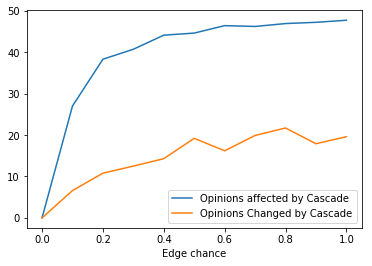

In [91]:
edgeChanceDf = df.copy()
groupDf = edgeChanceDf.groupby("Edge chance").mean()
groupDf[["Opinions affected by Cascade","Opinions Changed by Cascade"]].plot()

## Experimento 2: Relacion entre numero de nodos y Opiniones

In [98]:
filename ="./data/numberOfNodes.csv"
wipeResults(filename)
repetitions = 20
noLogs = 'true'
edgeChance = 0.3
for n in np.arange(50,501,50):
    for i in range(repetitions):
        !node index $filename $edgeChance $noLogs $n

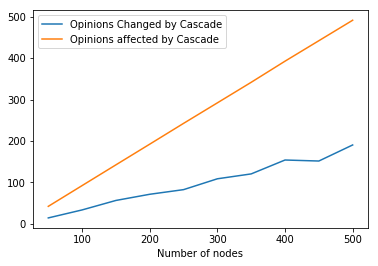

In [99]:
df = pd.read_csv(filename, sep=";")
numberOfNodesDf = df.copy()
numberOfNodesDf[['Opinions Changed by Cascade %']] = numberOfNodesDf[['Opinions Changed by Cascade']].div(numberOfNodesDf['Number of nodes'].values, axis=0)
groupDf = numberOfNodesDf.groupby("Number of nodes").mean()
groupDf[["Opinions Changed by Cascade","Opinions affected by Cascade"]].plot()


#### Cambia el porcentaje?

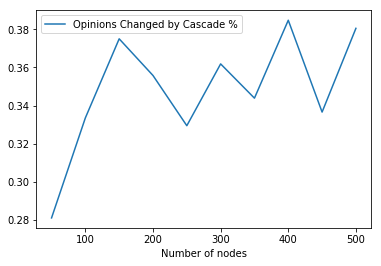

In [100]:
groupDf[["Opinions Changed by Cascade %"]].plot()

### Experimento 3: Analisis cualitativo del grafo 

In [44]:
import matplotlib.pyplot as plt
import networkx as nx

In [55]:
!node index.js

RED URN
Node : 0 sees red
Looking at his neighbours sees {}
mantained his decision:  red
Node 0 decides:  red 

BFS queue:  [ 9, 12 ]
Node : 9 sees blue
Looking at his neighbours sees { red: 1 }
mantained his decision:  blue
Node 9 decides:  blue 

BFS queue:  [ 12, 4, 7, 8 ]
Node : 12 sees red
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  red
Node 12 decides:  red 

BFS queue:  [ 4, 7, 8, 2, 5, 6, 13 ]
Node : 4 sees blue
Looking at his neighbours sees { blue: 1 }
mantained his decision:  blue
Node 4 decides:  blue 

BFS queue:  [ 7, 8, 2, 5, 6, 13 ]
Node : 7 sees red
Looking at his neighbours sees { blue: 2, red: 1 }
mantained his decision:  red
Node 7 decides:  red 

BFS queue:  [ 8, 2, 5, 6, 13, 3, 11 ]
Node : 8 sees red
Looking at his neighbours sees { red: 1, blue: 1 }
mantained his decision:  red
Node 8 decides:  red 

BFS queue:  [ 2, 5, 6, 13, 3, 11, 10 ]
Node : 2 sees red
Looking at his neighbours sees { blue: 1, red: 1 }
mantained his decision:  

Ejes: (1, 6)
Ejes: (7, 6)
Ejes: (11, 6)
Ejes: (12, 6)


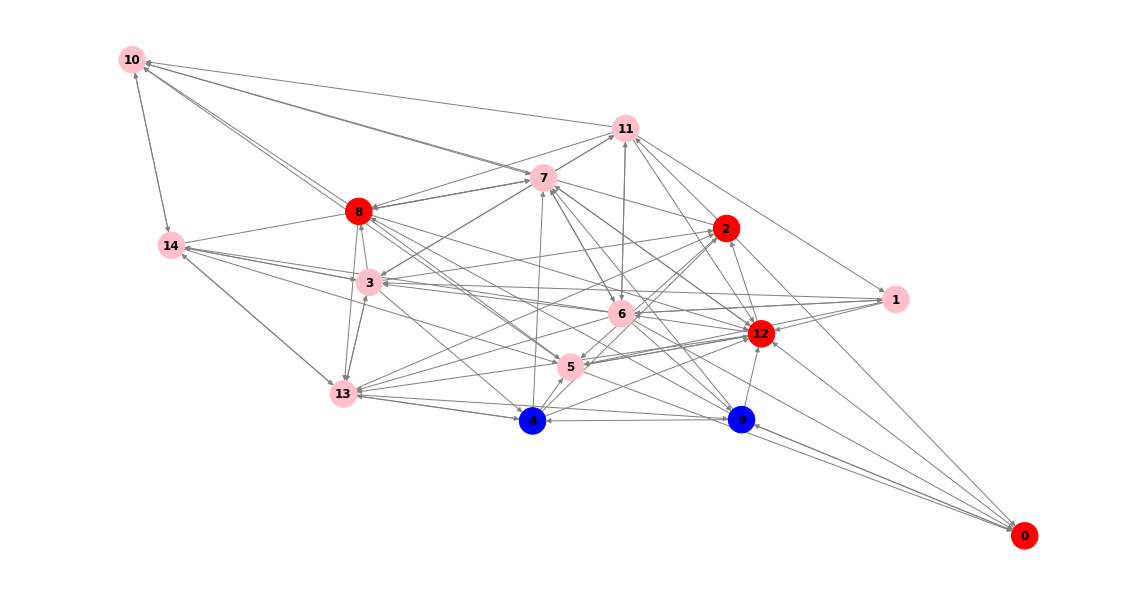

In [56]:
f = open("./graphInfo",'r')
# print(f.read())
[nodes,edges,decisions] = f.read().split(';')
nodes = nodes.split(',')
edges = edges.split('-')
decisions = decisions.split(',')
for i in range(len(nodes)):
    nodes[i] = eval(nodes[i])

for i in range(len(edges)):
    edges[i] = eval(edges[i])
    edges[i] = (edges[i][1],edges[i][0]) 
    
for i in range(len(edges)):
    if(edges[i][1] == 6):
        print("Ejes:",edges[i])
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
plt.figure(figsize=(15,8))
nx.draw_spring(G, node_color=decisions, with_labels=True, font_weight='bold', edge_color='grey',node_size=700)


# Descomentar para dibujar en circulo
# nx.draw_circular(G, node_color=decisions, with_labels=True, font_weight='bold', edge_color='grey',node_size=700)
# plt.savefig("graph.png")
